In [4]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [5]:
idate = '20200815'
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_wavelet_BT_'+idate+'_*.nc'
origfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_108_BT_'+idate+'_*.nc'

In [6]:
data = xr.open_mfdataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [7]:
data

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667, time: 96)
Coordinates:
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
  * time     (time) datetime64[ns] 2020-08-15 ... 2020-08-15T23:45:00
Data variables:
    power    (time, lat, lon) float64 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
    BT       (time, lat, lon) int16 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [8]:
tstep_old = data.isel(time=-24).load() #-24

In [9]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667)
Coordinates:
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
    time     datetime64[ns] 2020-08-15T18:00:00
Data variables:
    power    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    BT       (lat, lon) int16 1137 1017 1000 948 930 ... 3016 3018 3012 3001
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

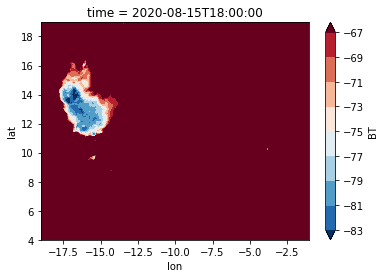

In [10]:
(tstep_old['BT']/100).plot.contourf(levels=np.arange(-83,-65,2))

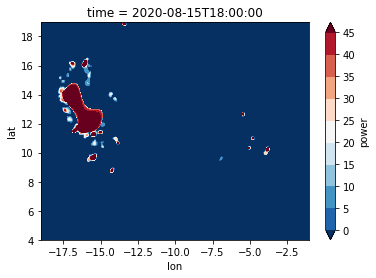

In [11]:
tstep_old['power'].plot.contourf(levels=np.arange(0,50,5))

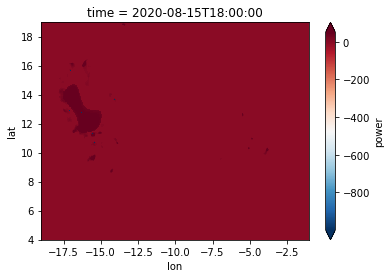

In [12]:
tstep_old['power'].plot.pcolormesh(vmin=-999, vmax=50, cmap='RdBu_r')

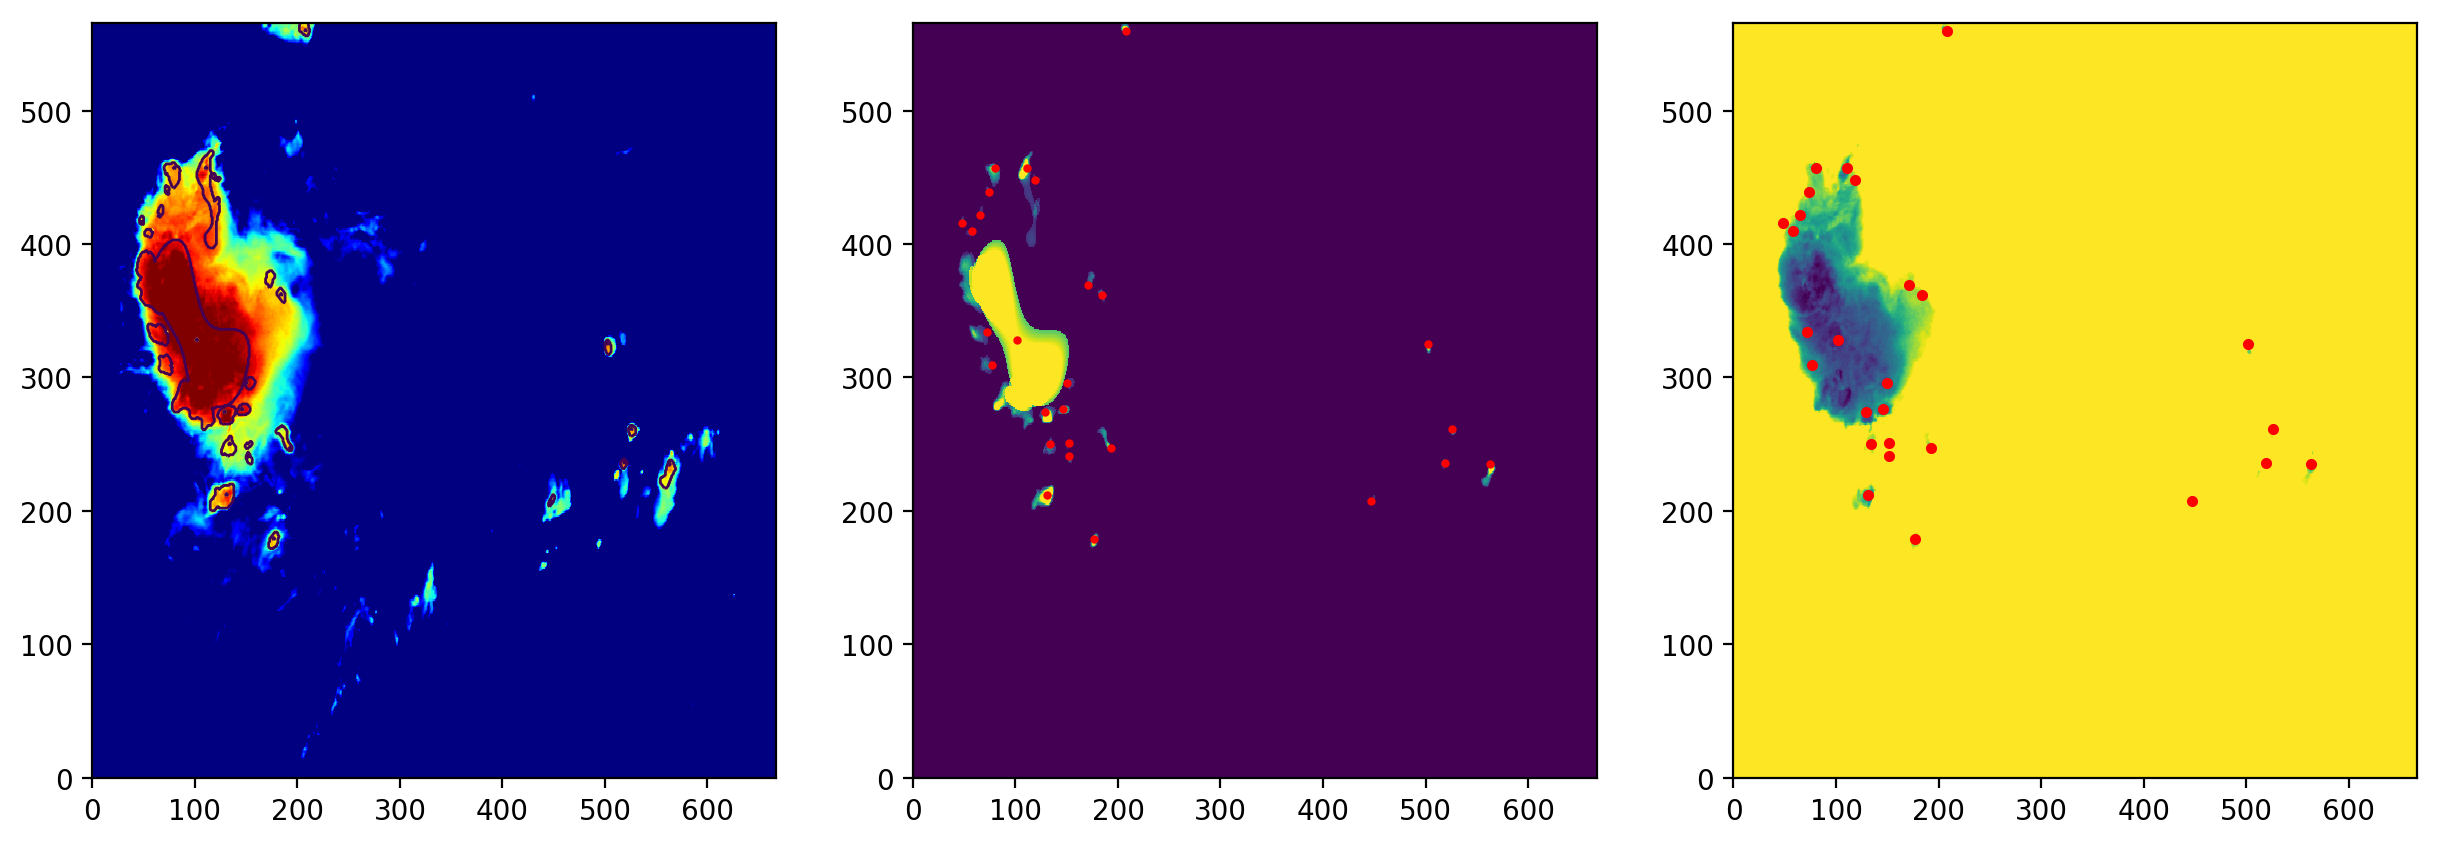

In [13]:
lon, lat = np.meshgrid(tstep_old['lon'], tstep_old['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(tstep_old['BT']/100, vmin=-80, vmax=-40, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[-5,0], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(132)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(133)
plt.pcolormesh(tstep_old['BT']/100, vmax=-65, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    

#f.savefig('/home/ck/DIR/cornkle/data/test/old_cores'+tag+'.png')


In [14]:
#tstep_old = xr.open_mfdataset(origfile, decode_times=False)
meteosat_data = tstep_old['BT'].values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
outt, nogood, t_thresh_size, t_thresh_cut, pix_nb, area_img = utils.filter_img(meteosat_data, 3)

outmin -87.23 32.27


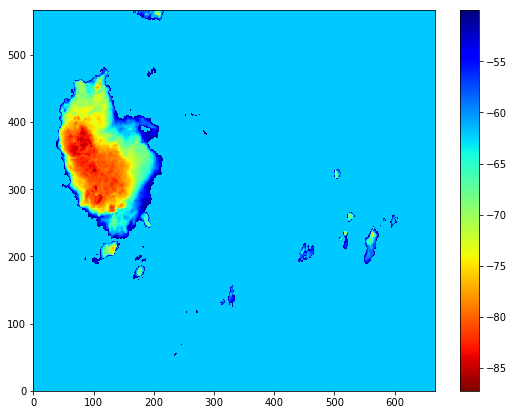

In [15]:
plt.figure(figsize=(9,7))
plt.pcolormesh(outt, cmap='jet_r')
plt.colorbar()

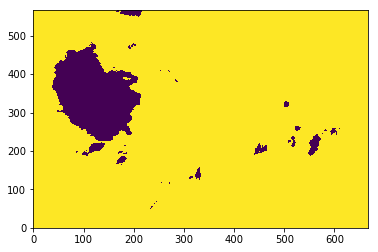

In [16]:
plt.pcolormesh(nogood)

In [17]:
wav = wavelet.waveletT(outt, dataset='METEOSAT3K_veraLS')

In [18]:
wav.keys()

dict_keys(['power', 'scales', 'res', 'coeffs'])

In [19]:
wav['scales']

array([ 12.        ,  18.1885988 ,  27.56876052,  41.78642704,
        63.33637972,  96.        , 145.50879038])

In [20]:
wav['power'].shape

(7, 566, 667)

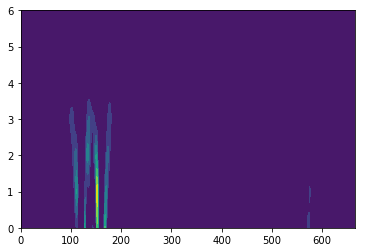

In [21]:
plt.contourf(wav['power'][:,240,:])

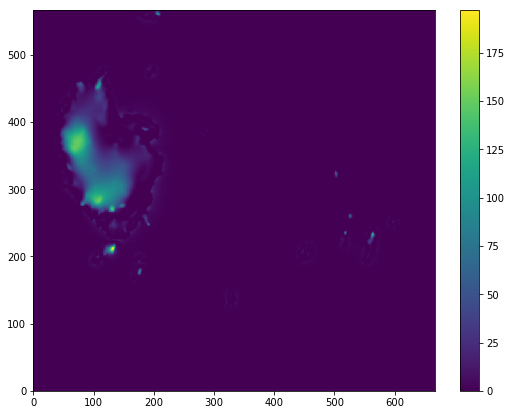

In [22]:
plt.figure(figsize=(9,7))
plt.pcolormesh(wav['power'].sum(axis=0))
plt.colorbar()

In [23]:
power_msg = utils.find_fixed_power(wav, outt, nogood, area_img,3)

In [24]:
wav.keys()

dict_keys(['power', 'scales', 'res', 'coeffs'])

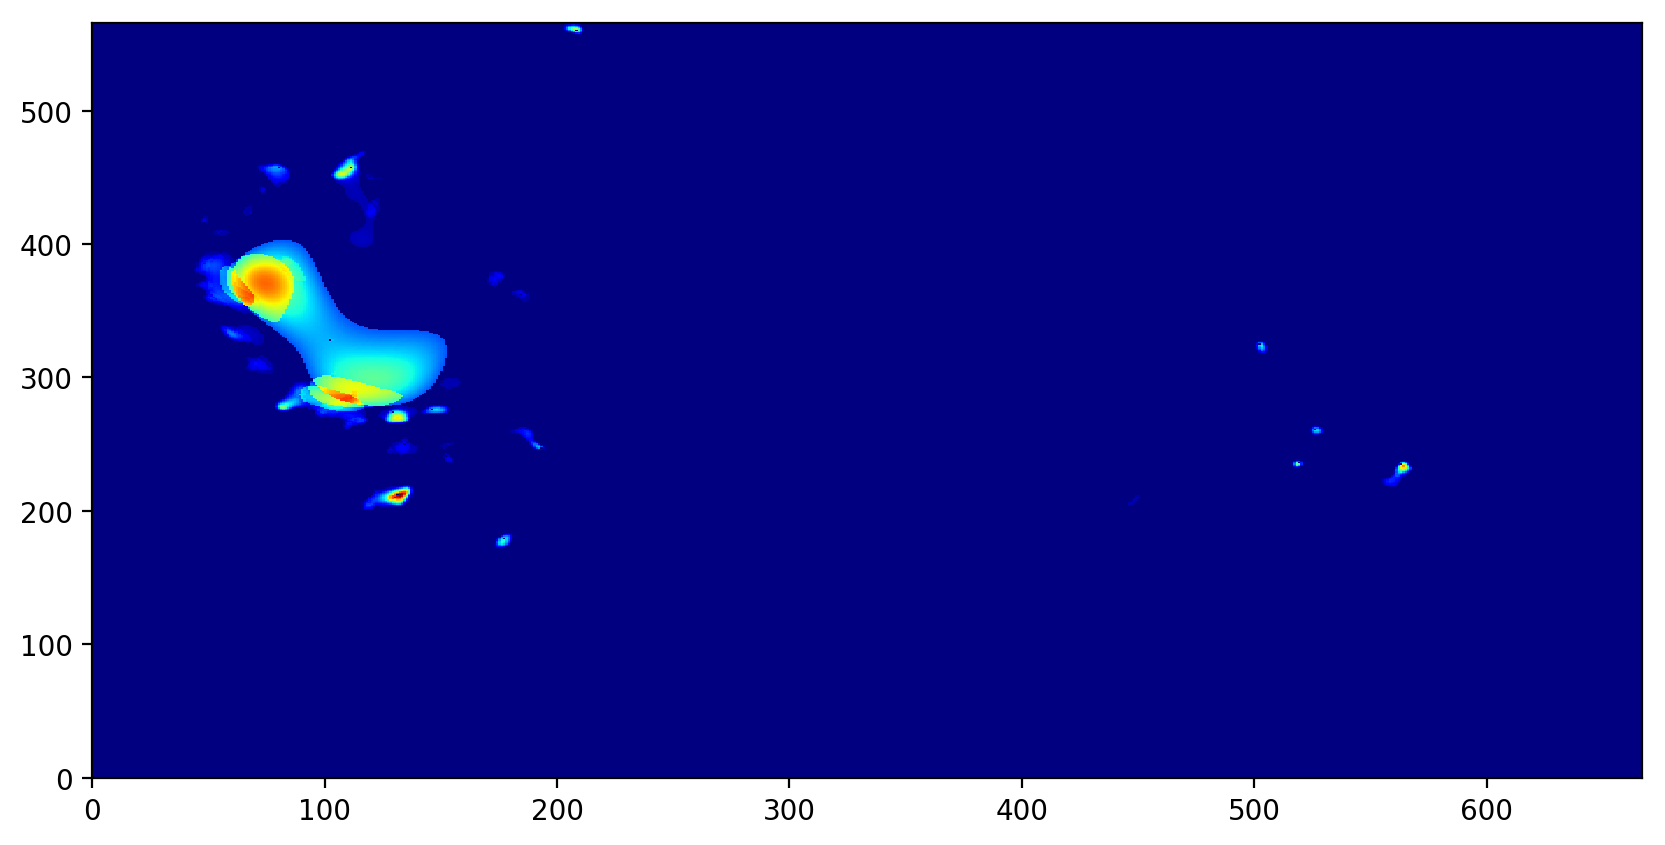

In [25]:
plt.figure(figsize=(10,5), dpi=200)
plt.pcolormesh(tstep_old['power'], vmin=0, cmap='jet')

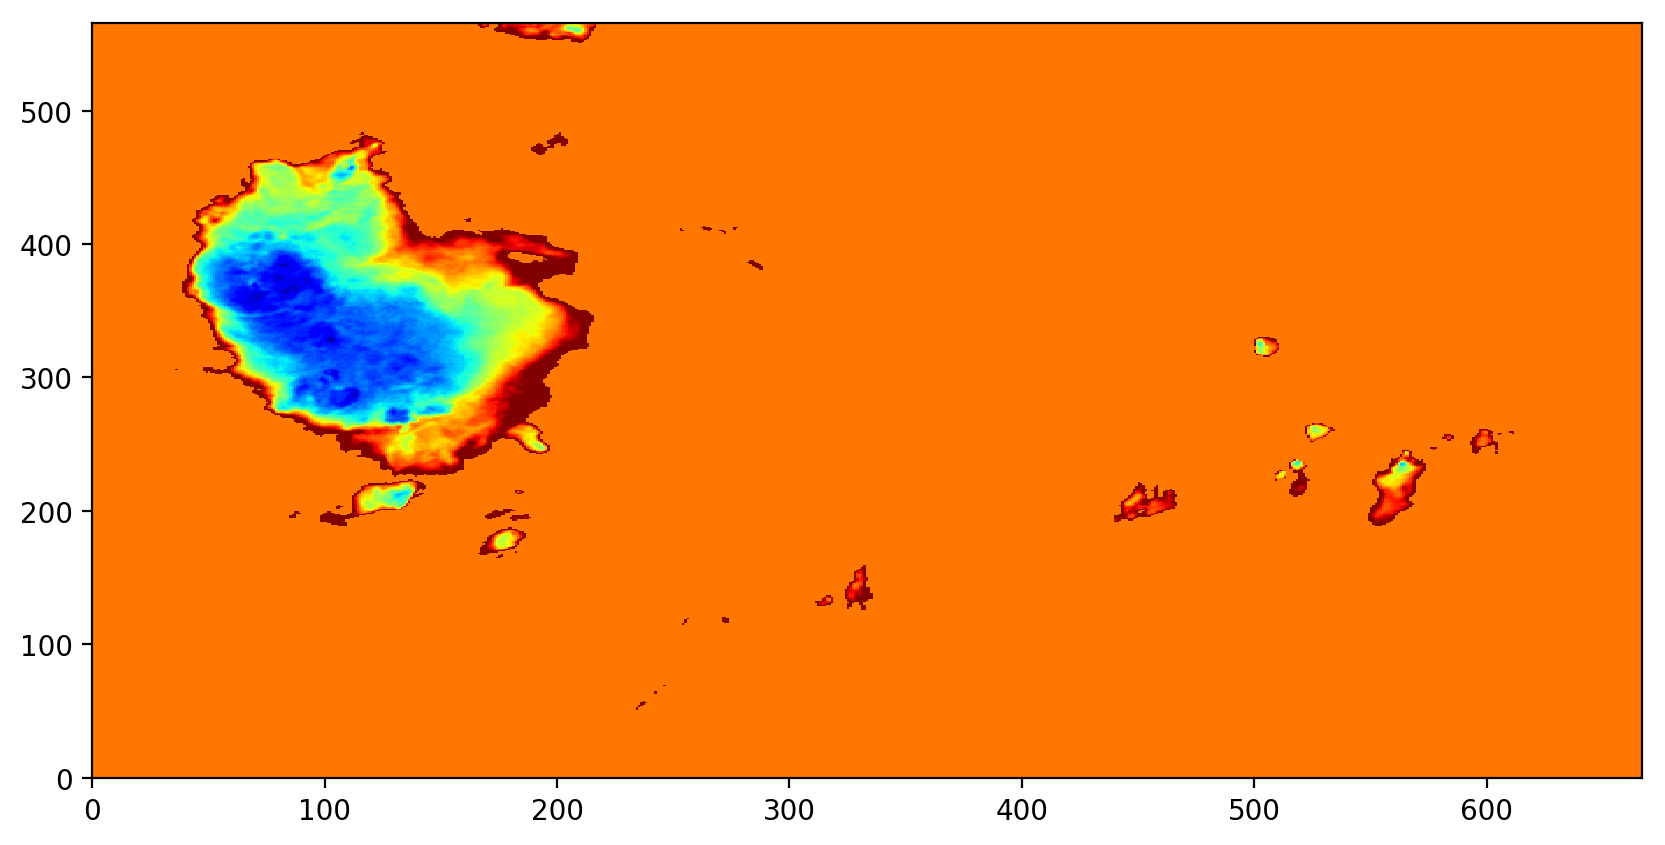

In [26]:
plt.figure(figsize=(10,5), dpi=200)
plt.pcolormesh(outt, vmax=-55, cmap='jet')

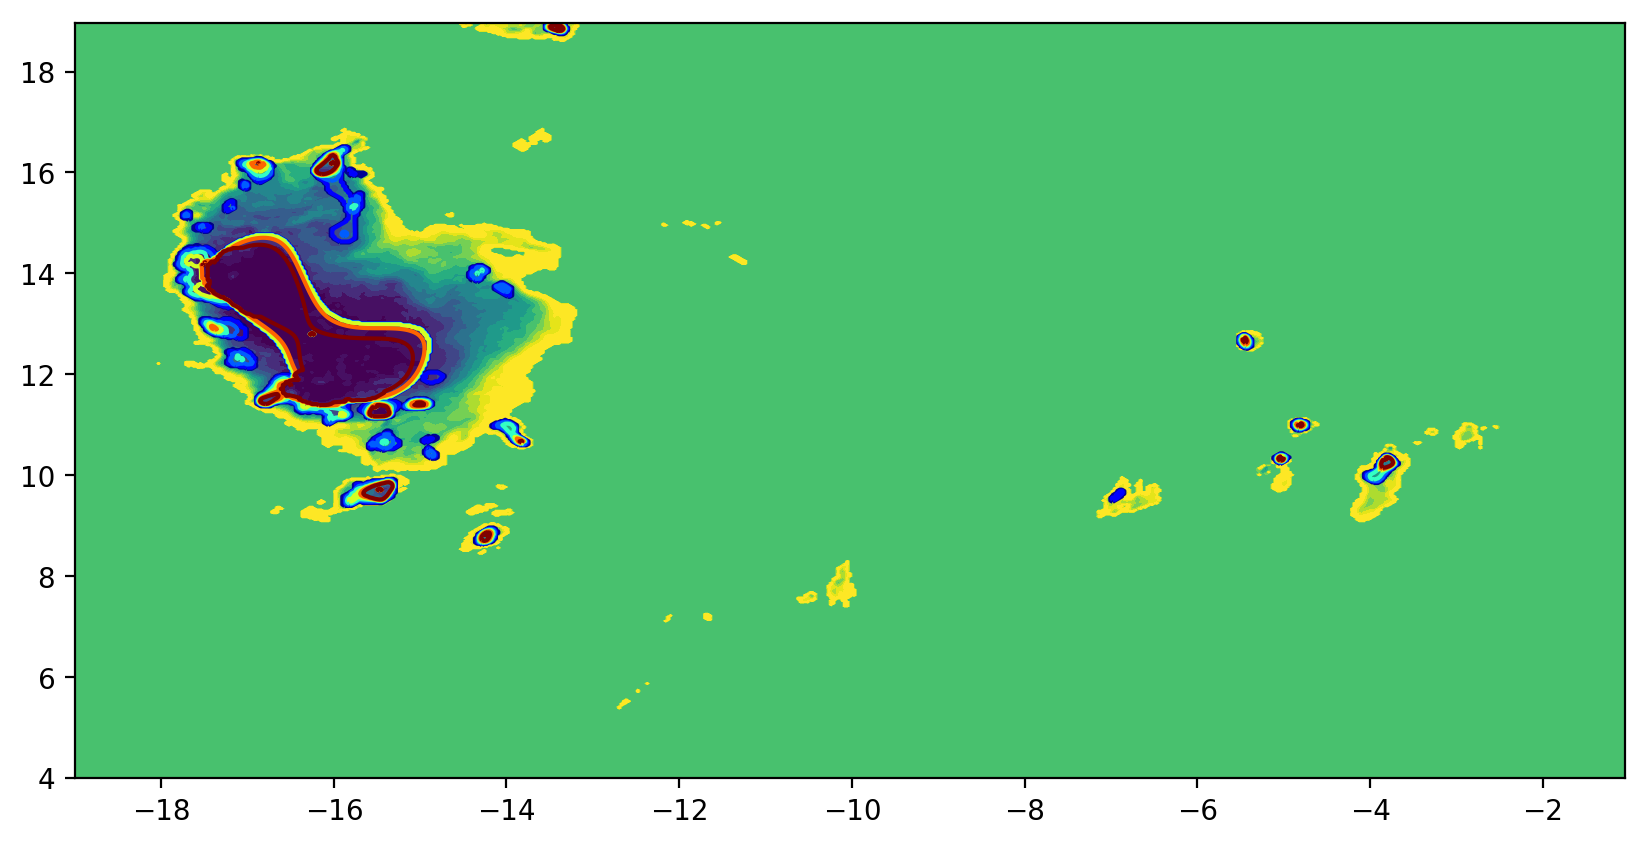

In [27]:
plt.figure(figsize=(10,5), dpi=200)
plt.contourf(longitudes,latitudes,outt, levels=np.arange(-80,-55,2), extend='both')
plt.contour(longitudes,latitudes, power_msg, cmap='jet', levels=[-1, 0, 5,10,20,30,40,50])

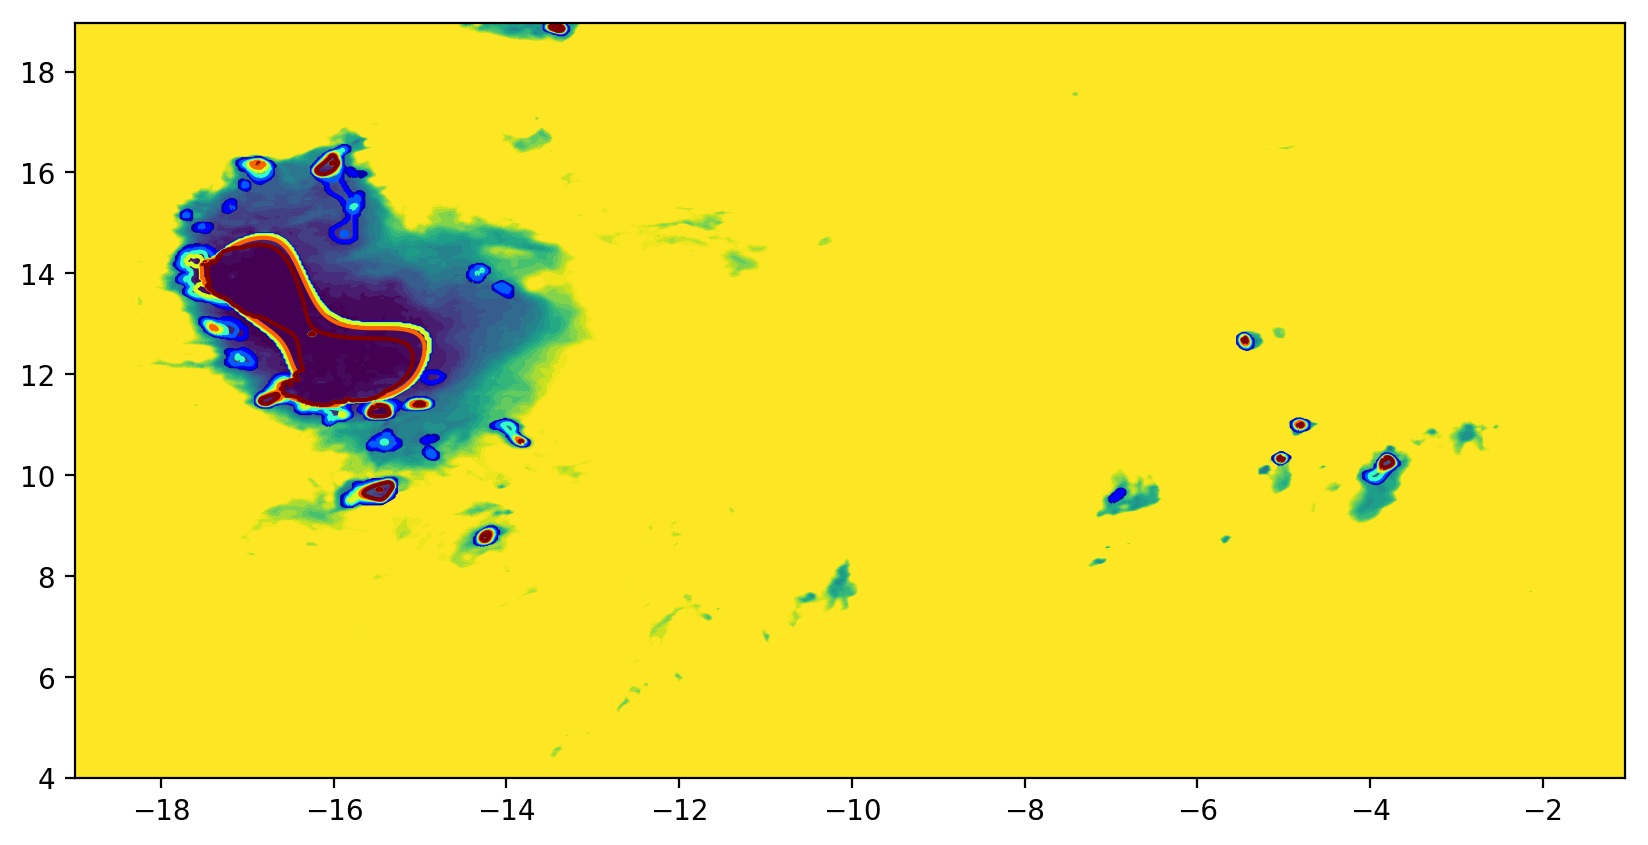

In [28]:
plt.figure(figsize=(10,5), dpi=200)
plt.contourf(longitudes,latitudes,tstep_old['BT'].values/100, levels=np.arange(-80,-40,2), extend='both')
plt.contour(longitudes,latitudes, tstep_old['power'].values, cmap='jet', levels=[-1, 0,1,5,10,20,30,40,50])

(array([  0.,   0.,   0., 243., 388., 326., 349., 368., 251., 145., 127.,
        113., 105., 112., 109., 121.,  89.,  95.,  76.,  68.,  75.,  50.,
         50.,  65.,  61.,  73.,  62.,  62.,  49.,  54.,  56.,  46.,  39.,
         44.,  36.,  26., 125., 151., 142., 134., 156., 125., 139., 137.,
        142., 139., 148., 135., 143., 152., 145., 161., 173., 140., 149.,
        128., 125.,  89., 113.,  83.,  94.,  76.,  81.,  66.,  81.,  82.,
         59.,  73.,  72.,  70.,  80.,  63.,  76.,  59.,  71.,  65.,  69.,
         75.,  75.,  64.,  43.,  30.,  26.,  17.,  24.,  30.,  14.,  22.,
         21.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 

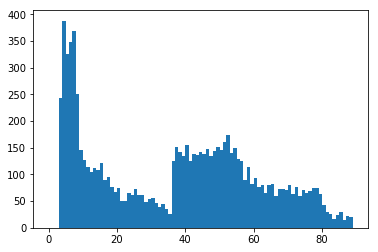

In [29]:
inputs = wav['power'].sum(axis=0)
inputs[inputs<=1] = np.nan
logn = inputs
plt.hist(logn[np.isfinite(logn)], bins=np.arange(0,90,1))

(array([  0.,   0.,   0.,  38., 113., 145., 232., 290., 200., 117.,  99.,
         82.,  66.,  88.,  72., 100.,  76.,  80.,  64.,  64.,  73.,  50.,
         47.,  65.,  62.,  68.,  60.,  63.,  47.,  50.,  58.,  44.,  39.,
         42.,  35.,  26., 124., 147., 141., 132., 155., 129., 140., 133.,
        146., 136., 145., 131., 144., 149., 149., 161., 172., 140., 147.,
        128., 120.,  97., 110.,  82.,  96.,  75.,  83.,  67.,  75.,  84.,
         60.,  75.,  71.,  71.,  77.,  60.,  74.,  64.,  68.,  67.,  69.,
         78.,  74.,  64.,  44.,  31.,  24.,  19.,  24.,  28.,  16.,  21.,
         22.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 

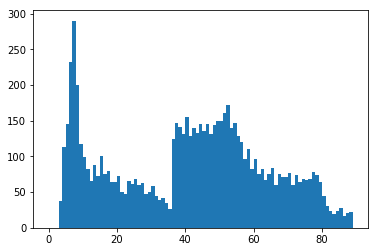

In [30]:
inputs = tstep_old['power'].values
inputs[inputs<=1] = np.nan
logn = inputs
plt.hist(logn[np.isfinite(logn)], bins=np.arange(0,90,1))

In [31]:
meteosat_data = tstep_old['BT'].copy().values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
savefile = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [32]:
date

<xarray.DataArray 'time' ()>
array('2020-08-15T18:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-08-15T18:00:00

In [33]:
date = [pd.datetime(date['time.year'], date['time.month'], date['time.day'], date['time.hour'], date['time.minute'])]

In [34]:
data = run_powerBlobs.wavelet_analysis(meteosat_data, longitudes, latitudes, date, savefile, data_resolution=3)

outmin -87.23 32.27
Saved /home/ck/DIR/cornkle/data/test/testblob.nc


In [35]:
data

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2020-08-15T18:00:00
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
Data variables:
    power    (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    BT       (time, lat, lon) int16 1137 1017 1000 948 ... 3016 3018 3012 3001
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [36]:
#newtest = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [37]:
#data = xr.open_dataset(newtest).load()#.sel(lat=slice(6,8), lon=slice(6,9.5))
tstep = data.squeeze()

In [38]:
tstep['BT']

<xarray.DataArray 'BT' (lat: 566, lon: 667)>
array([[1137, 1017, 1000, ..., 1921, 1780, 1682],
       [1083, 1016,  977, ..., 1796, 1788, 1651],
       [1045, 1009,  974, ..., 1843, 1932, 1853],
       ...,
       [2007, 2007, 2017, ..., 2995, 2996, 2997],
       [2013, 2018, 2016, ..., 3009, 2992, 2992],
       [2019, 2026, 2032, ..., 3018, 3012, 3001]], dtype=int16)
Coordinates:
    time     datetime64[ns] 2020-08-15T18:00:00
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052

/home/ck/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


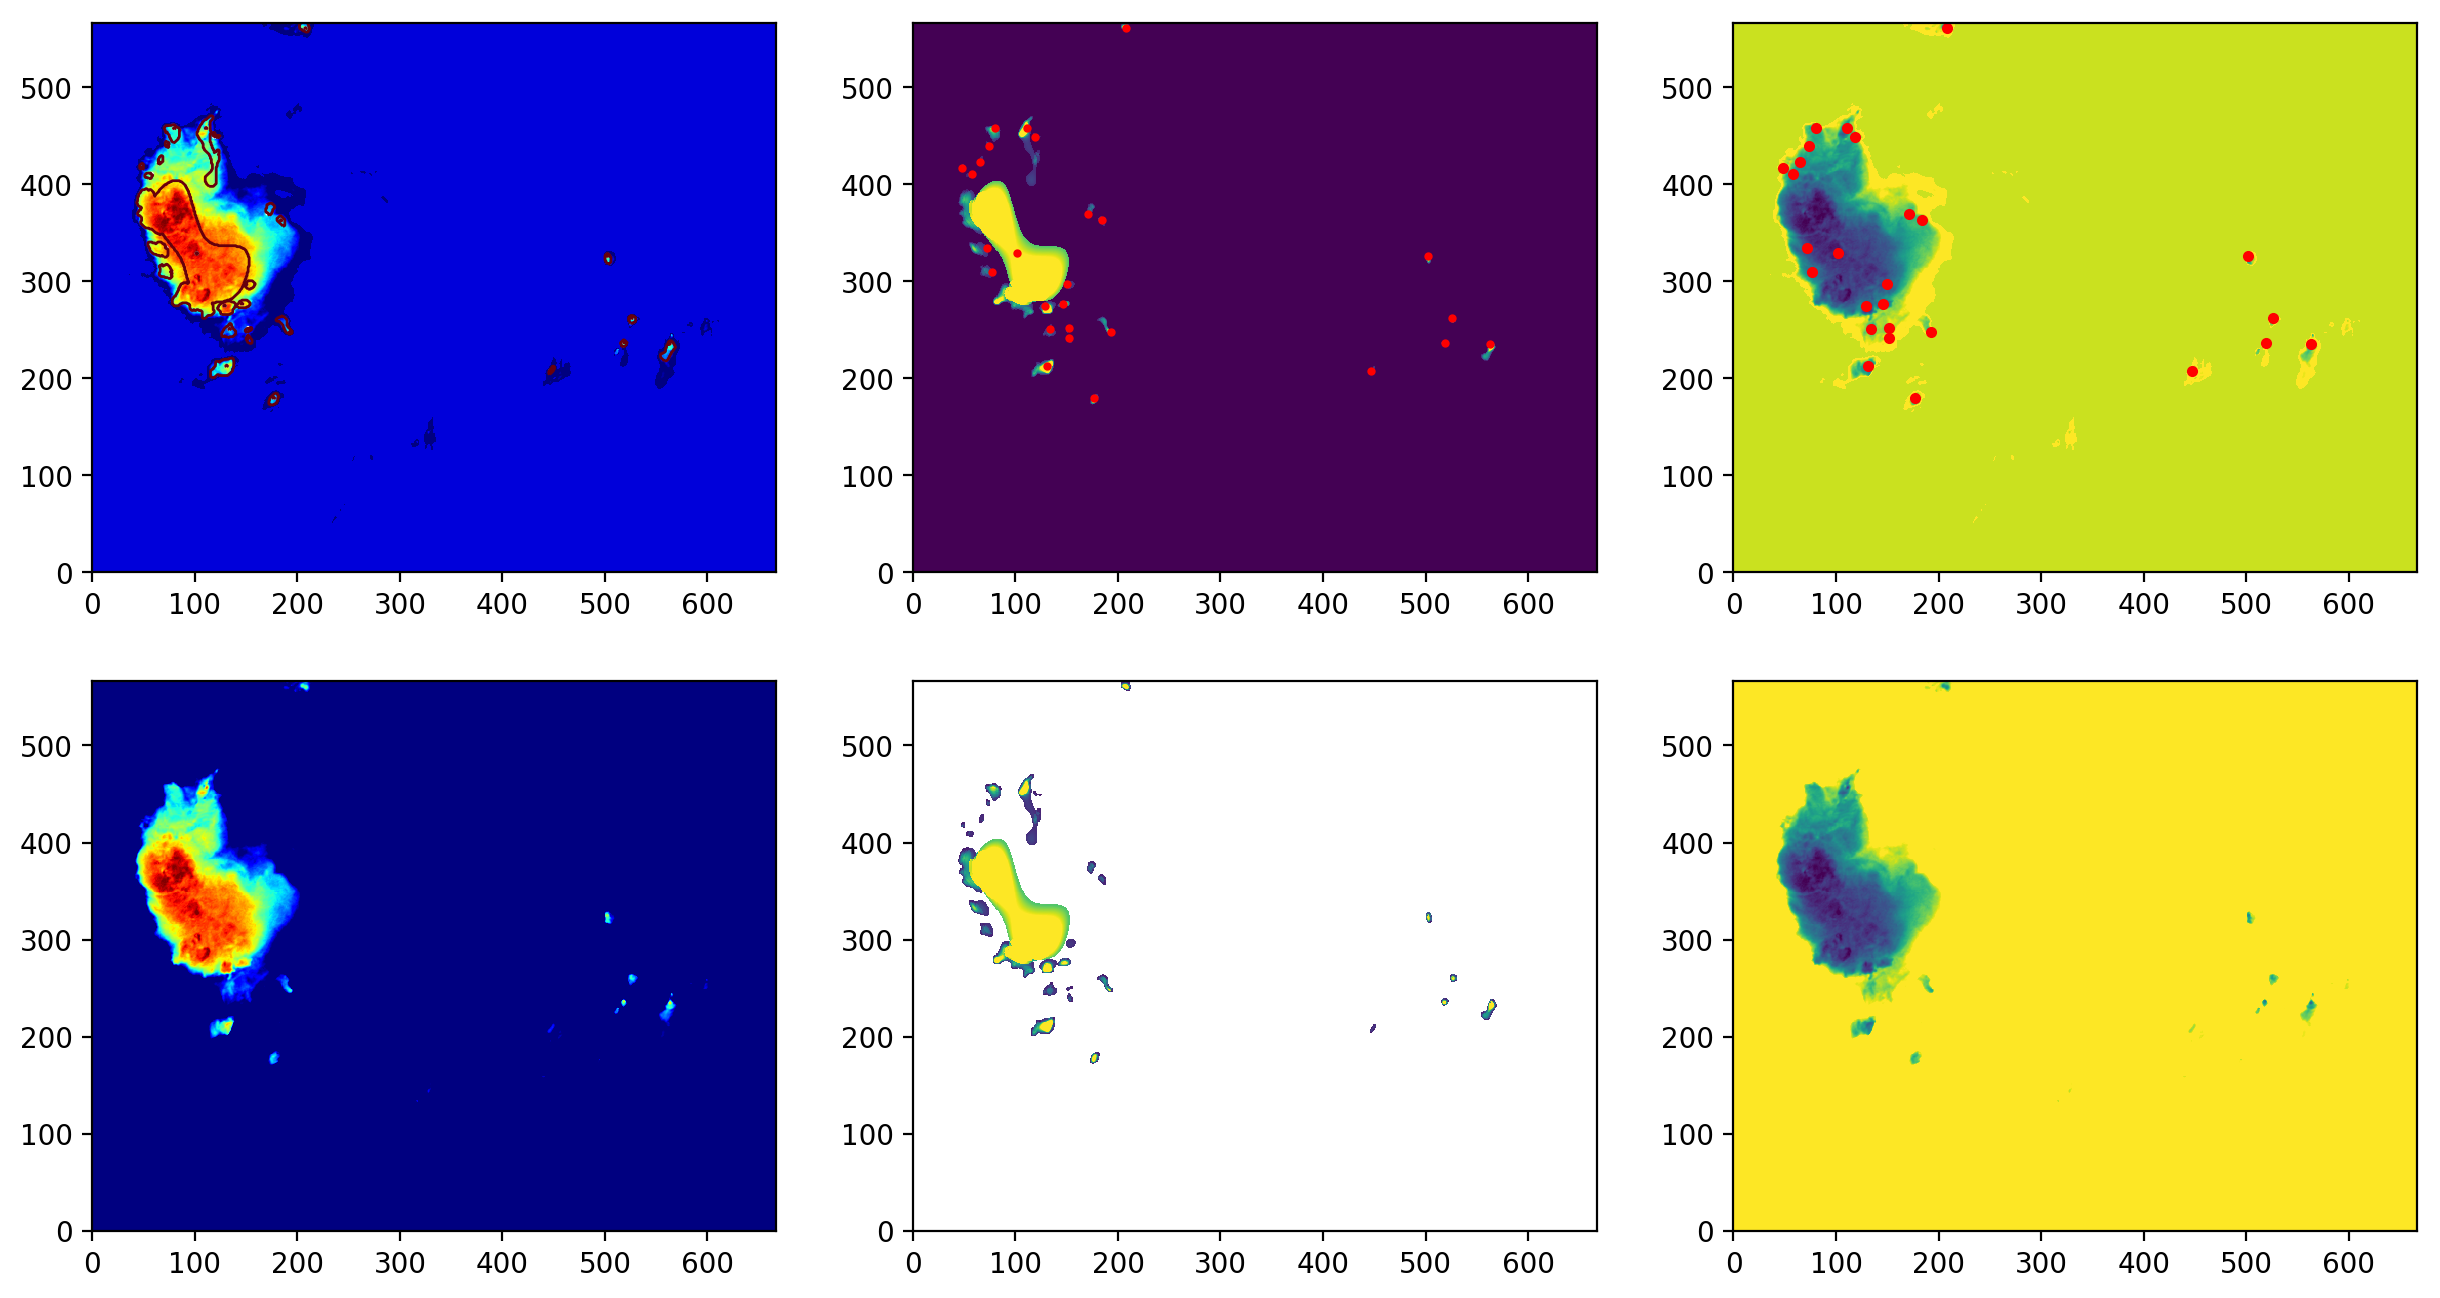

In [39]:
lon, lat = np.meshgrid(tstep['lon'], tstep['lat'])

f = plt.figure(figsize=(15,8), dpi=200)
f.add_subplot(231)
plt.pcolormesh(outt, vmin=-85, vmax=-60, cmap='jet_r')
plt.contour(power_msg, levels=[-5,1], extend='both', linewidths=1, cmap='Reds')

npos = np.where(power_msg<-100)

f.add_subplot(232)
plt.pcolormesh(power_msg, vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(233)
plt.pcolormesh(outt, vmax=-60, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    
####################    

f.add_subplot(234)
plt.pcolormesh(tstep_old['BT']/100, vmin=-85, vmax=-60, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[-5,1], extend='both', linewidths=1, cmap='Reds')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(235)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(236)
plt.pcolormesh(tstep_old['BT']/100, vmax=-60, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    
#f.savefig('/home/ck/DIR/cornkle/data/test/new_cores'+tag+'.png')

/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


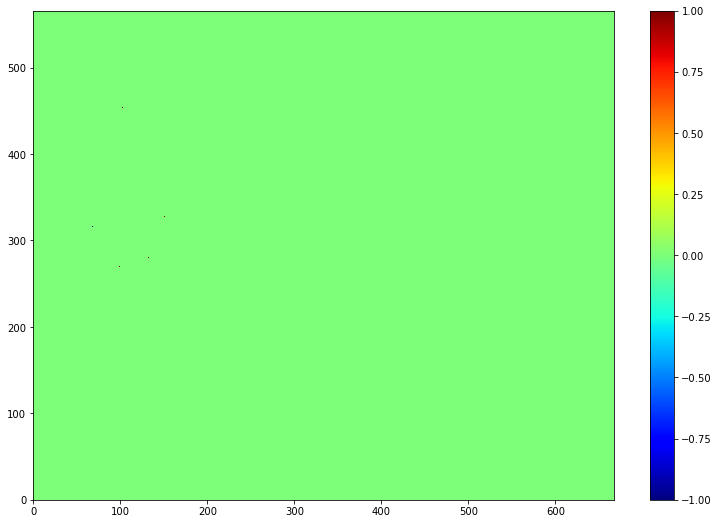

In [40]:
old_mask = np.array(tstep_old['power'].values > 0, dtype=int)
new_mask = np.array(power_msg > 0, dtype=int)
plt.figure(figsize=(13,9))
plt.pcolormesh(old_mask-new_mask, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()